In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('gene_expression.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [5]:
df.head()

Gene One  Gene Two  Cancer Present
0       4.3       3.9               1
1       2.5       6.3               0
2       5.7       3.9               1
3       6.1       6.2               0
4       7.4       3.4               1

In [7]:
df.describe()

Gene One     Gene Two  Cancer Present
count  3000.000000  3000.000000     3000.000000
mean      5.600133     5.410467        0.500000
std       1.828388     1.729081        0.500083
min       1.000000     1.000000        0.000000
25%       4.300000     4.000000        0.000000
50%       5.600000     5.400000        0.500000
75%       6.900000     6.700000        1.000000
max      10.000000    10.000000        1.000000

In [13]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

<Axes: xlabel='Gene One', ylabel='Gene Two'>

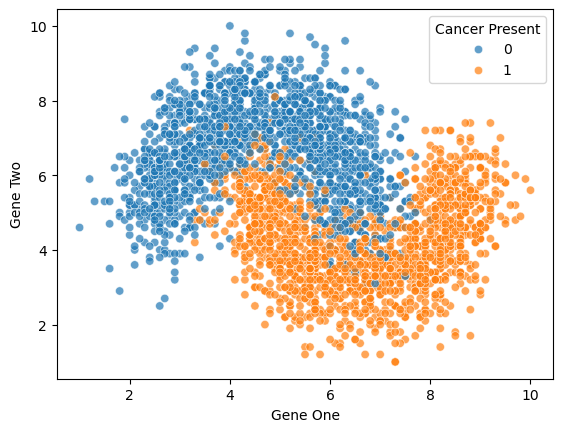

In [11]:
sns.scatterplot(data=df , x='Gene One' , y='Gene Two' , hue='Cancer Present' , alpha=0.7)

# train test split & scaling

In [5]:
X=df.drop('Cancer Present' , axis=1)
y=df['Cancer Present']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=1)

In [9]:
knn_model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred=knn_model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , accuracy_score

In [38]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       470
           1       0.90      0.90      0.90       430

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900



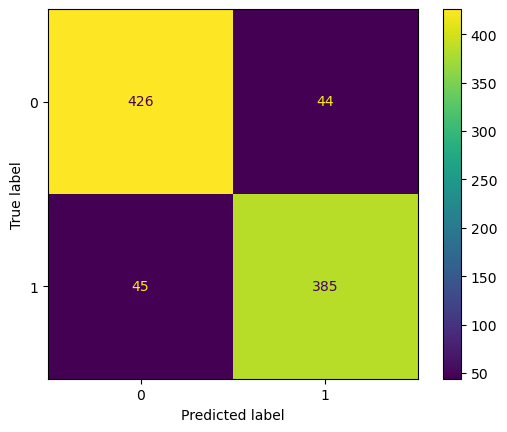

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test , y_pred)

In [17]:
KNN_Error_List=[]
for k in range(1,31):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train , y_train)
    knn_predict=knn_model.predict(X_test)
    knn_error=1-accuracy_score(y_test , knn_predict)
    KNN_Error_List.append(knn_error)

Text(0, 0.5, 'Error')

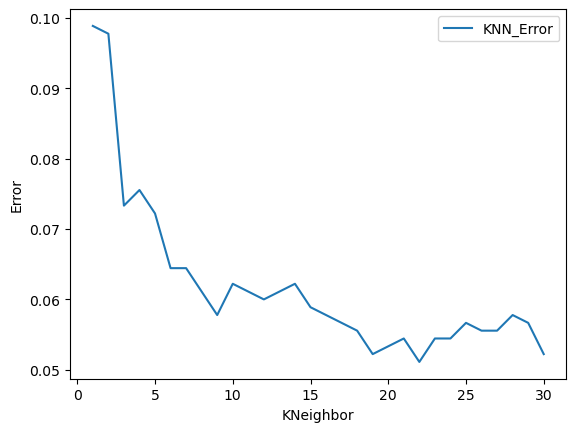

In [19]:
plt.plot(range(1,31) , KNN_Error_List  , label='KNN_Error')
plt.legend()
plt.xlabel('KNeighbor')
plt.ylabel('Error')